In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters as f
from skimage.color import rgb2gray
import skimage.io as io
from PIL import Image

In [3]:
def twodConv(f,w):
    m = len(w)
    n = len(w[0])
    if m == n:
        y = len(f)
        x = len(f[0])
        g = np.pad(f, int((m-1)/2), mode='constant')
        new = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                    new[i][j] = np.sum(g[i:i+m, j:j+m] * w)
        return new

In [4]:
w = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]
ft = np.zeros((5,5))
ft[2][2] = 1
print(ft)
out = twodConv(ft,w)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


[[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]


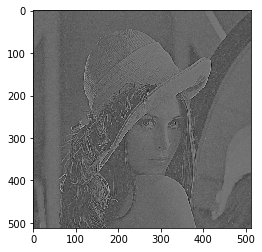

In [16]:
imgL = rgb2gray(plt.imread("lena_bw.pgm"))
k = [[-1,-1,-1],[-1,9,-1],[-1,-1,-1]]
print(k)
plt.gray()
imgout = twodConv(imgL,k)
plt.imshow(imgout)
plt.imsave('lena.tiff', imgout)

In [6]:
print(out)

[[0. 0. 0. 0. 0.]
 [0. 9. 8. 7. 0.]
 [0. 6. 5. 4. 0.]
 [0. 3. 2. 1. 0.]
 [0. 0. 0. 0. 0.]]


In [7]:
def createBoxFilter(size):
    out = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            out[i][j] = 1/(size*size)
    return out

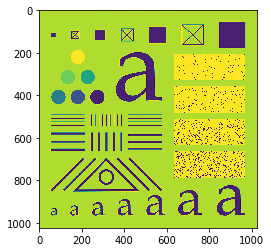

In [8]:
w = createBoxFilter(77)
img = plt.imread('images/testpattern1024.tif')
imgA = np.asarray(img)
out2 = twodConv(imgA, w)
plt.imshow(imgA)

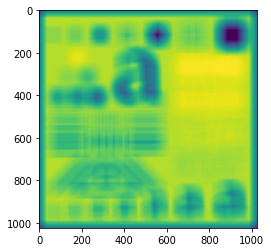

In [9]:
plt.imshow(out2)

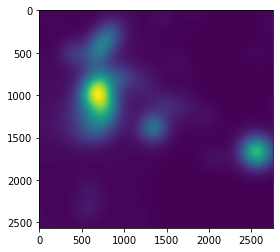

In [8]:
image = plt.imread('images/hickson-compact-group.tif')
blurred = f.gaussian(image, sigma=(100, 100), truncate=3.5, multichannel=False)
arra = np.asarray(blurred)
plt.imshow(blurred)
io.imsave(fname="blurred.tif", arr=arra)

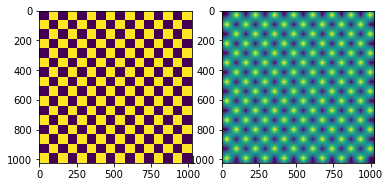

In [9]:
check = plt.imread('images/checkerboard1024.tif')
ft, axarr = plt.subplots(1,2)
axarr[0].imshow(check)
w = createBoxFilter(65)
axarr[1].imshow(twodConv(check, w))

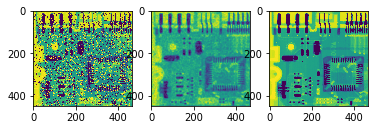

In [30]:
circuit = plt.imread('images/circuitboard.tif')
ft, axarr = plt.subplots(1,3)
axarr[0].imshow(circuit)
w = createBoxFilter(7)
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import median
from scipy import ndimage
axarr[1].imshow(twodConv(circuit, w))
out = ndimage.rank_filter(circuit, rank=6, size=4)
axarr[2].imshow(out)